# Tech4MentalHealth

In [1]:
import pandas as pd

In [22]:
DF = pd.read_csv('Train.csv')
DF_test = pd.read_csv('Test.csv')

In [37]:
DF_test.head()

,ID,text
0,02V56KMO,How to overcome bad feelings and emotions
1,03BMGTOK,I feel like giving up in life
2,03LZVFM6,I was so depressed feel like got no strength t...
3,0EPULUM5,I feel so low especially since I had no one to...
4,0GM4C5GD,can i be successful when I am a drug addict?


In [24]:
DF.label.value_counts()

label
Depression    352
Alcohol       140
Suicide        66
Drugs          58
Name: count, dtype: int64

In [25]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 616 entries, 0 to 615
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      616 non-null    object
 1   text    616 non-null    object
 2   label   616 non-null    object
dtypes: object(3)
memory usage: 14.6+ KB


In [26]:
# Map labels to numbers
label_map = {'Depression': 0, 'Alcohol': 1, 'Suicide': 2, 'Drugs': 3}
DF['label'] = DF['label'].map(label_map)

In [27]:
DF.head()

,ID,text,label
0,SUAVK39Z,I feel that it was better I dieAm happy,0
1,9JDAGUV3,Why do I get hallucinations?,3
2,419WR1LQ,I am stresseed due to lack of financial suppor...,0
3,6UY7DX6Q,Why is life important?,2
4,FYC0FTFB,How could I be helped to go through the depres...,0


# Split Data

In [101]:
from sklearn.model_selection import train_test_split

# Split data (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(DF['text'], DF['label'], test_size=0.2, random_state=42, stratify=DF['label'])


print(f"Training samples: {len(X_train)}, Test samples: {len(X_test)}")

Training samples: 492, Test samples: 309


# Convert Text to TF-IDF

In [102]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [103]:
# Convert text to TF-IDF vectors
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_val_tfidf = vectorizer.transform(X_val)


# Train Logistic Regression Model

In [104]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(class_weight='balanced', max_iter=1000)
log_reg.fit(X_train_tfidf, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [105]:
y_pred_log = log_reg.predict(X_val_tfidf)

#  Model Performance

In [106]:
from sklearn.metrics import classification_report, accuracy_score

# Evaluate Model Performance
print("Model Accuracy:", accuracy_score(y_val, y_pred_log))
print("\nClassification Report:\n", classification_report(y_val, y_pred_log))

Model Accuracy: 0.8387096774193549

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87        71
           1       0.89      0.86      0.87        28
           2       0.53      0.62      0.57        13
           3       0.91      0.83      0.87        12

    accuracy                           0.84       124
   macro avg       0.80      0.79      0.80       124
weighted avg       0.84      0.84      0.84       124



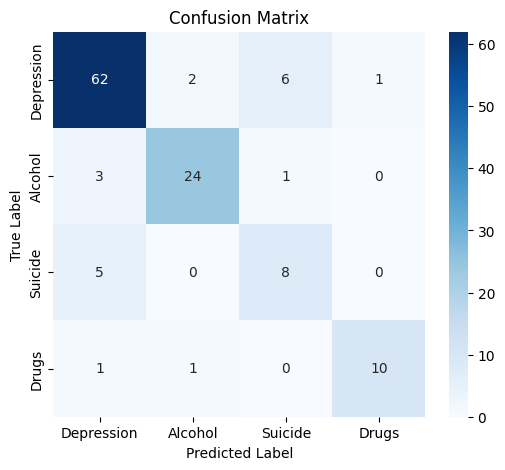

In [115]:

# Compute confusion matrix
cm = confusion_matrix(y_val, y_pred_log)

# Plot it
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=['Depression', 'Alcohol', 'Suicide', 'Drugs'], yticklabels=['Depression', 'Alcohol', 'Suicide', 'Drugs'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title("Confusion Matrix")
plt.show()

# Save Submission File

In [116]:
# Convert test data text to TF-IDF (same vectorizer)
X_test_tfidf = vectorizer.transform(DF_test['text'])

In [117]:
# Predict probabilities for each class
test_probs = model.predict_proba(X_test_tfidf)

In [118]:
# Convert to DataFrame with proper column names
submission = pd.DataFrame(test_probs, columns=['Depression', 'Alcohol', 'Suicide', 'Drugs'])


In [119]:
# Insert ID column from test dataset
submission.insert(0, "ID", DF_test["ID"])

# Save as CSV file
submission.to_csv("submission.csv", index=False, float_format="%.3f")
print("\nSubmission file saved as submission.csv")



Submission file saved as submission.csv


In [120]:
# Load and display first few rows of submission file
submission_check = pd.read_csv("submission.csv")


In [121]:
print(submission_check.head())


         ID  Depression  Alcohol  Suicide  Drugs
0  02V56KMO       0.718    0.183    0.063  0.036
1  03BMGTOK       0.957    0.018    0.016  0.009
2  03LZVFM6       0.958    0.018    0.013  0.011
3  0EPULUM5       0.857    0.060    0.050  0.033
4  0GM4C5GD       0.271    0.350    0.099  0.280
